### 목표
- 환자 데이터를 바탕으로 해당 환자가 유방암인지 아닌지를 구분하는 신경망 모델을 만들어보자

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn에서 지원해주는 학습용 유방워 데이터 셋 임포트
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 문제
X = data['data']
# 정답
y = data['target']

In [ ]:
X.shape, y.shape

((569, 30), (569,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(426, 30)
(143, 30)
(426,)
(143,)


### 인공신경망 모델링
- 1.신경망 구조 설계
- 2.학습 및 평가방법 설정
- 3.학습 및 시각화
- 4.모델평가


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer, Dense

In [27]:
model = Sequential()


model.add(Dense(50, input_dim=30, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 50)                1550      
                                                                 
 dense_21 (Dense)            (None, 100)               5100      
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dense_23 (Dense)            (None, 10)                510       
                                                                 
 dense_24 (Dense)            (None, 1)                 11        
                                                                 
Total params: 12,221
Trainable params: 12,221
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='SGD', # 최적화 함수 : 확률적 경사하강법(SGD) 활용
              metrics = ['acc'] # metrics : 평가방법을 설정 (분류 문제이므로 정확도 출력 필요)              )
              )

In [29]:
h = model.fit(X_train, y_train,
              epochs=100
              )

Epoch 1/100
14/14 [==============================] - 2s 3ms/step - loss: 1.0819 - acc: 0.3662
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.9460 - acc: 0.3662
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 0.8531 - acc: 0.3662
Epoch 4/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7911 - acc: 0.3662
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7500 - acc: 0.3662
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7219 - acc: 0.3662
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.7013 - acc: 0.3662
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6860 - acc: 0.6338
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6768 - acc: 0.6338
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.6705 - acc: 0.6338
Epoch 11/100
14/14 [==============================] - 0s 4m

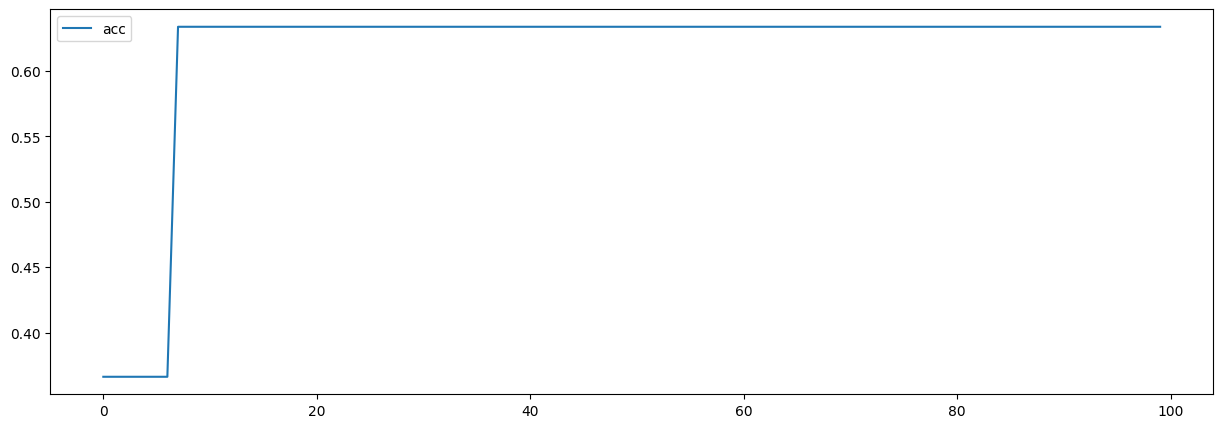

In [30]:
plt.figure(figsize=(15, 5))

plt.plot(h.history['acc'], label='acc')

plt.legend()
plt.show()